In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

In [14]:
def prepare_X_Y():
    filename = '../ressources/datasets/dataset_train.csv'

    data = pd.read_csv(filename, sep=",", index_col="Index")
    data = data.dropna()

    # similaire result (see Histogram)
    del data['Care of Magical Creatures']
    del data['Arithmancy']
    # data identic with defense ag. (see scatter_plot)
    del data['Astronomy']

    X = np.array((data.iloc[:,5:]))
    y = np.array(data.loc[:, "Hogwarts House"])
    return X, y

In [74]:
class LogisticRegression():
    def __init__(self, learning_rate=0.01, n_iteration=100, cost_threshold=0.01):
        self.learning_rate = learning_rate
        self.n_iter = n_iteration
        self.cost_threshold = cost_threshold

    def _scaling(self, X):
        '''
        avoid an overflow
        '''
        for i in range(len(X)):
            X[i] = (X[i] - X.mean()) / X.std()
        return X
    
    def _sigmoid_function(self, x):
        value = 1 / (1 + np.exp(-x))
        return value
    
    def _hypothesis(self, theta, X):
        return 1 / (1 + np.exp(-(np.dot(theta, X.T)))) - 0.0000001
    
    def _compute_cost(self, theta, X, Y):
        reg_strength = 10000
        loss = X.shape[0]
        distances = 1 - Y * (np.dot(X, theta))
        distances[distances < 0] = 0  # max(0, distance)
        hinge_loss = reg_strength * (np.sum(distances) / loss)
        # cost
        cost = 1 / 2 * np.dot(theta, theta) + hinge_loss
        return cost
    
    def _gradient_descent(self, X, h, theta, y, m):
        '''
        theta = theta - alpha * sigma(h^i - y^i)(X^ij)
        '''
        gradient_value = np.dot(X.T, (h - y)) / m
        theta -= self.learning_rate * gradient_value
        return theta

    def _sgd(self, X, y, m):
        dic = dict()

        for i in np.unique(y):
            nth = 0
            prev_cost = float("inf")
            X, y = shuffle(X, y)
            y_onevsall = np.where(y == i, 1, 0)
            theta = np.zeros(X.shape[1])
            dic[i] = list()

            for epoch in range(self.n_iter):
                z = X.dot(theta)
                h = self._sigmoid_function(z)
                theta = self._gradient_descent(X, h, theta, y_onevsall, m)
                # self.theta_array.append(theta, i)
                dic[i].append(theta)
                if epoch == 2 ** nth or epoch == self.n_iter:
                    cost = self._compute_cost(theta, X, y_onevsall)
                    print("{} -> Epoch is: {} and cost is: {}".format(i, epoch, cost))
                    # stoppage criterion
                    if abs(prev_cost - cost) < self.cost_threshold * prev_cost:
                        break
                    prev_cost = cost
                    nth += 1
            self.theta.append((theta, i))
            self.cost.append((cost, i))
        self.theta_dic = dic
    
    def fit(self, X, y):
        self.theta = []
        self.cost = []
        np.apply_along_axis(self._scaling, 0, X)
        X = np.insert(X, 0, 1, axis=1)
        m = len(y)
        self._sgd(X, y, m)
        return self
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        X_predicted = [max((self._sigmoid_function(i.dot(theta)), c) for theta, c in self.theta)[1] for i in X]
        return X_predicted
    
    def score(self, X, y):
        score = sum(self.predict(X) == y) / len(y)
        return score
    
    def _plot_cost(self, costh):
        for cost, c in costh:
            plt.plot(range(len(cost)), cost, 'r')
            plt.title('Convergence Graph of Cost Function of type-' + str(c) + ' vs All')
            plt.xlabel('Number of Iterations')
            plt.ylabel('Cost')
            plt.show()

In [75]:
X, y = prepare_X_Y()

In [77]:
logi = LogisticRegression(learning_rate=0.01, n_iteration=300000, cost_threshold=0.01).fit(X, y)

Gryffindor -> Epoch is: 1 and cost is: 9942.981149780355
Gryffindor -> Epoch is: 2 and cost is: 9914.894700907602
Hufflepuff -> Epoch is: 1 and cost is: 9963.203991550301
Hufflepuff -> Epoch is: 2 and cost is: 9944.934628308281
Ravenclaw -> Epoch is: 1 and cost is: 9957.098118860029
Ravenclaw -> Epoch is: 2 and cost is: 9935.879618396517
Slytherin -> Epoch is: 1 and cost is: 9958.731233221997
Slytherin -> Epoch is: 2 and cost is: 9938.311447528215


In [78]:
logi.score(X, y)

0.9808153477218226

In [80]:
print(logi.theta_dic)

{'Gryffindor': [array([-0.00870702, -0.00784622, -0.0055199 ,  0.00109646, -0.00164363,
       -0.00073762, -0.01217203, -0.00296039, -0.00704898,  0.00203522,
        0.00842343]), array([-0.00870702, -0.00784622, -0.0055199 ,  0.00109646, -0.00164363,
       -0.00073762, -0.01217203, -0.00296039, -0.00704898,  0.00203522,
        0.00842343]), array([-0.00870702, -0.00784622, -0.0055199 ,  0.00109646, -0.00164363,
       -0.00073762, -0.01217203, -0.00296039, -0.00704898,  0.00203522,
        0.00842343])], 'Hufflepuff': [array([-0.00503416,  0.00720691, -0.00940484,  0.0034137 , -0.00403795,
       -0.00330232,  0.00372521, -0.001012  , -0.00400998,  0.00123381,
       -0.00309717]), array([-0.00503416,  0.00720691, -0.00940484,  0.0034137 , -0.00403795,
       -0.00330232,  0.00372521, -0.001012  , -0.00400998,  0.00123381,
       -0.00309717]), array([-0.00503416,  0.00720691, -0.00940484,  0.0034137 , -0.00403795,
       -0.00330232,  0.00372521, -0.001012  , -0.00400998,  0.0012

In [84]:
import matplotlib.pyplot as plt 

# plt.figure()
# plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
plt.plot(logi.theta_dic[y[0]])
# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0, args["epochs"]), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()
# np.dot(X, logi.theta)

NameError: name 'args' is not defined

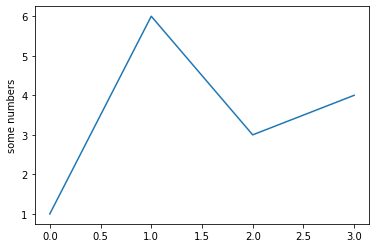

In [82]:
import matplotlib.pyplot as plt 

plt.plot([1, 6, 3, 4])
plt.ylabel('some numbers')
plt.show()
